In [2]:
# Import the modules
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential

from matplotlib.pyplot import imshow
import numpy as np
import cv2
from keras.utils import img_to_array

np.random.seed(42)

In [17]:
SIZE = 256

img = cv2.imread('./img/autoencoders/monalisa.jpeg', 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (SIZE, SIZE))
img.shape

(256, 256, 3)

In [18]:
img_data = []
img_data.append(img_to_array(img))
img_array = np.reshape(img_data, (len(img_data), SIZE, SIZE, 3))
img_array.shape

(1, 256, 256, 3)

In [19]:
# Normalize
img_array = img_array.astype('float32') / 255

In [21]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation="relu", padding='same', input_shape=(SIZE, SIZE, 3)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3,3), activation="relu", padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3,3), activation="relu", padding='same'))

model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(8, (3,3), activation="relu", padding='same'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(8, (3,3), activation="relu", padding='same'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(32, (3,3), activation="relu", padding='same'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(3, (3,3), activation="relu", padding='same'))

model.compile(optimizer="adam", loss="mean_squared_error", metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 128, 128, 32)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 128, 128, 8)       2312      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 8)        0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 64, 64, 8)         584       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 32, 32, 8)       

In [ ]:
model.fit(img_array, img_array, epochs=5, shuffle=True)

1/1 [==============================] - 0s 39ms/step


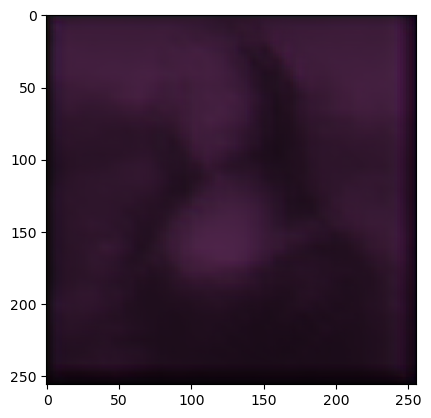

In [24]:
pred = model.predict(img_array)
imshow(pred[0].reshape(SIZE, SIZE, 3))

In [ ]:
model.fit(img_array, img_array, epochs=50, shuffle=True)

1/1 [==============================] - 0s 34ms/step


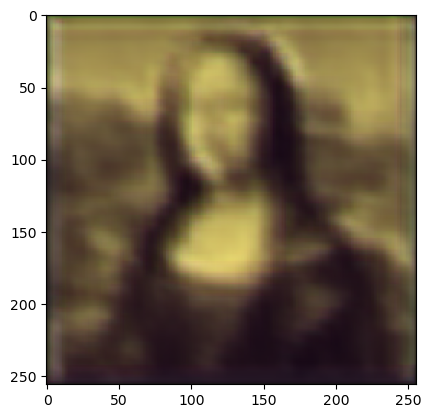

In [26]:
pred = model.predict(img_array)
imshow(pred[0].reshape(SIZE, SIZE, 3))

In [ ]:
model.fit(img_array, img_array, epochs=500, shuffle=True)

1/1 [==============================] - 0s 37ms/step


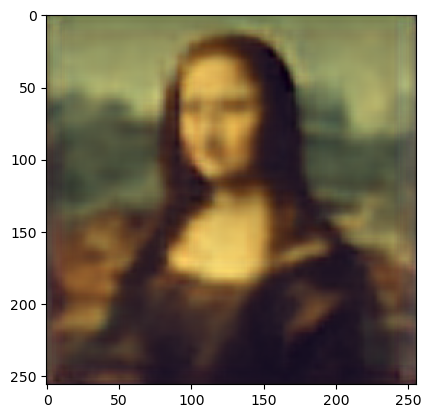

In [28]:
pred = model.predict(img_array)
imshow(pred[0].reshape(SIZE, SIZE, 3))